In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
import matplotlib.pyplot as plt

In [5]:
df = df.iloc[:,1:] # I want all rows and 1st column onwards all columns

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


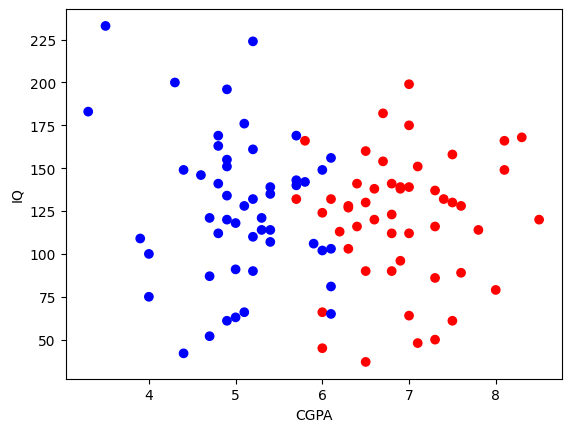

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'],cmap='bwr') #0 maps to blue, 1 maps to red

plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.show()

In [13]:
x=df.iloc[:,0:2] # only selecting columns of indexes 0 and 1
y=df.iloc[:,-1] # only selecting last column

In [14]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1) # first train-test-split, then scaling values

In [16]:
X_train

,cgpa,iq
84,5.7,169.0
73,4.9,61.0
37,8.1,149.0
0,6.8,123.0
99,6.2,113.0
...,...,...
91,7.5,158.0
87,5.7,132.0
43,6.8,141.0
80,4.9,196.0


In [17]:
X_test

,cgpa,iq
56,6.1,65.0
74,6.7,154.0
82,6.5,37.0
1,5.9,106.0
16,5.2,224.0
76,4.9,155.0
60,6.9,139.0
93,6.8,112.0
46,5.3,114.0
61,7.3,137.0


In [18]:
y_train

,placement
84,0
73,0
37,1
0,1
99,1
...,...
91,1
87,1
43,1
80,0


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.23268787,  1.17882637],
       [-0.9165053 , -1.61926699],
       [ 1.8187644 ,  0.66066093],
       [ 0.70756108, -0.01295414],
       [ 0.19469802, -0.27203685],
       [ 1.73328722, -1.15291809],
       [-0.1472107 ,  1.10110155],
       [-1.17293683,  0.58293612],
       [ 0.45112955,  0.16840377],
       [ 1.56233286, -0.24612858],
       [-1.6857999 , -1.25655118],
       [-0.83102812, -1.56745044],
       [-0.48911941, -0.24612858],
       [ 1.13494697, -0.97156019],
       [-0.48911941,  0.40157821],
       [ 0.02374366,  0.01295414],
       [ 0.28017519,  0.11658722],
       [-0.57459659, -0.06477068],
       [ 0.28017519, -0.53111957],
       [ 0.02374366, -0.55702784],
       [-0.1472107 ,  0.47930303],
       [ 0.28017519,  0.09067895],
       [-0.74555094, -1.48972563],
       [ 0.79303826, -0.71247747],
       [-2.11318579,  2.83695576],
       [-0.48911941,  0.29794513],
       [-0.83102812, -0.84201883],
       [ 0.53660673, -0.09067895],
       [ 1.13494697,

In [20]:
X_test = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
clf = LogisticRegression()
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred = clf.predict(X_test) #predictions

In [24]:
y_test

,placement
56,0
74,1
82,1
1,0
16,0
76,0
60,1
93,1
46,0
61,1


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

<Axes: >

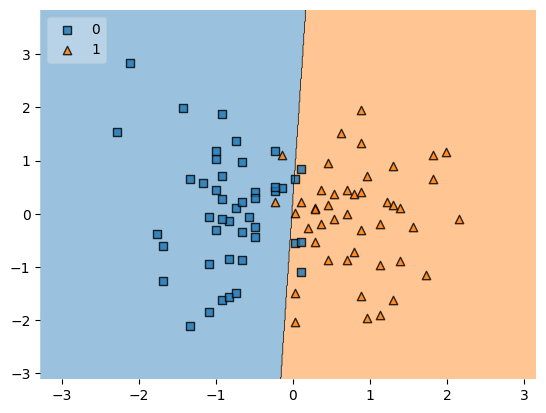

In [26]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2) #displays decision boundary of the logistic regression model